Python is easy to learn!


5

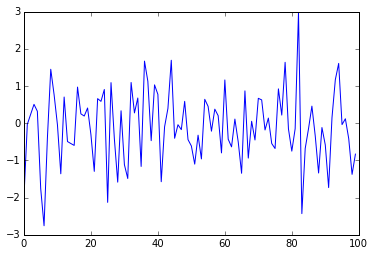

In [22]:
print "Python is easy to learn!"

plot(randn(100))
myvar = 3
myvar +=2
myvar

In [5]:
%pylab inline
mydict = {"Key 1": "Value 1", 2: 3, "pi": 3.14}
mydict

Populating the interactive namespace from numpy and matplotlib


{2: 3, 'Key 1': 'Value 1', 'pi': 3.14}

In [1]:
%pylab inline
print("Hello World")

Populating the interactive namespace from numpy and matplotlib
Hello World


In [21]:
first_name = "Nora"
last_name = "Attinger"
print(first_name + " " + last_name)

Nora Attinger


In [19]:

shopping_list = [ 'eggs', 'milk', 'cheese', 'celery', 'peanut butter', 'baking soda' ]
for i in shopping_list:
    print(i)

eggs
milk
cheese
celery
peanut butter
baking soda


In [18]:
import time
print(time.localtime())

time.struct_time(tm_year=2016, tm_mon=1, tm_mday=5, tm_hour=13, tm_min=36, tm_sec=46, tm_wday=1, tm_yday=5, tm_isdst=0)


In [18]:
%pylab inline
from azureml import Workspace
ws = Workspace(
    workspace_id='3064b77827bf495296f258c0aa5ff91f',
    authorization_token='df28e0ba5c7f4c699e30db772c042247',
    endpoint='https://studioapi.azureml.net'
)
ds = ws.datasets['TEST_DS.csv']
frame = ds.to_dataframe()

Populating the interactive namespace from numpy and matplotlib


In [19]:
print(frame)

  Name;Anzahl
0      Nora;1
1      Alex;5
2      Lara;3


In [17]:
import sys
myvar = sys.stdin.readline()
print(myvar)

Populating the interactive namespace from numpy and matplotlib



`%matplotlib` prevents importing * from pylab and numpy


In [16]:
'sadf'

'sadf'

In [23]:
from azureml import Workspace
ws = Workspace(
    workspace_id='3064b77827bf495296f258c0aa5ff91f',
    authorization_token='df28e0ba5c7f4c699e30db772c042247',
    endpoint='https://studioapi.azureml.net'
)
ds = ws.datasets['train.csv']
frame = ds.to_dataframe()

In [24]:
titanic = frame
# Print the first 5 observations
print(titanic.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [25]:
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Number of Observations: 891, Age: 714 (Rest is Missing)
Fill Median to missing values

In [28]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [29]:
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Only numeric variables are shown
We have to either exclude our non-numeric columns when we train our algorithm (Name, Sex, Cabin, Embarked, and Ticket), or find a way to convert them to numeric columns.

We'll ignore the Ticket, Cabin, and Name columns. There isn't much information we can extract from there. Most of the values in the cabin column are missing (only 204 values out of 891 rows), and it likely isn't a particularly informative column in the first place. The Ticket and Name columns are unlikely to tell us much without some domain knowledge about what the ticket numbers mean, and about which names correlate with characteristics like large or rich families.


### Converting the Sex and Embarked columns

In [30]:
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

In [31]:
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [32]:
print(titanic["Embarked"].unique())

[u'S' u'C' u'Q' nan]


We'll assign the code 0 to S, 1 to C and 2 to Q. Replace each value in the Embarked column with its corresponding code.

The most common embarkation port is S, so let's assume everyone got on there. Replace all the missing values in the Embarked column with S.

In [33]:
titanic["Embarked"] = titanic["Embarked"].fillna(0)
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
